In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_20_06.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_25_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_05_07.csv")

# Merge the dataframes
# df = pd.concat([df1, df2, df3], ignore_index=True)
df = df1.copy()

In [63]:
df["name"].value_counts()

name
The New Yorker A Wyndham Hotel                                   150
The Washington by LuxUrban                                       150
Empire Hotel                                                     148
Pod Times Square                                                 148
Paramount Times Square                                           148
                                                                ... 
Sonder The Industrialist                                           1
SpringHill Suites by Marriott New York Manhattan Times Square      1
Le Meridien New York, Fifth Avenue                                 1
The Gardens Sonesta ES Suites New York                             1
New York Marriott at the Brooklyn Bridge                           1
Name: count, Length: 535, dtype: int64

In [64]:
df.columns

Index(['Snapshot', 'start_date', 'end_date', 'name', 'TTT', 'LOS', 'score',
       'reviews', 'price_per_night', 'original_price', 'discount_perc',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'Index', 'star_rating', 'location_rating', 'neighborhood',
       'km_from_center', 'neighborhood_category', 'full_price'],
      dtype='object')

In [65]:
df[df["name"] == "Radio Hotel"]["Index"].value_counts().reset_index(name="count")

,Index,count
0,0,9
1,1,5
2,104,4
3,11,3
4,92,3
...,...,...
96,103,1
97,78,1
98,70,1
99,90,1


In [66]:
df[df["Index"] == 1]["name"].value_counts()

name
The New Yorker A Wyndham Hotel                      73
Club Quarters, Times Square - Midtown               36
Hilton Garden Inn New York Times Square South        8
Club Quarters Hotel, Grand Central                   5
Radio Hotel                                          5
Paramount Times Square                               4
Hotel St. James                                      2
Empire Hotel                                         2
YOTEL New York Times Square                          2
Doubletree by Hilton New York Times Square South     2
Arlo Midtown                                         2
Little Charlie Hotel                                 1
World Center Hotel                                   1
Ameritania Hotel at Times Square                     1
Hyatt Place New York Midtown South                   1
Chelsea Inn                                          1
Aura Hotel Times Square                              1
Name: count, dtype: int64

# create group of index pages: 

In [67]:
filter_df = df.groupby(['TTT', 'LOS', 'Snapshot']).filter(lambda x: len(x) > 1)

In [68]:
filter_df.sort_values(by=["TTT", "LOS", "Snapshot"])

,Snapshot,start_date,end_date,name,TTT,LOS,score,reviews,price_per_night,original_price,...,No_payment,Breakfast,Option Member,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category,full_price
0,47:04.6,21/06/2024,22/06/2024,"Club Quarters Hotel, Grand Central",1,1,8.680000,1950,179,199,...,0,0,1,1,3.762618,9.322013,Unknown,2.905059,Unknown,179
1,47:04.6,21/06/2024,22/06/2024,Hotel Boutique at Grand Central,1,1,8.680000,1052,179,199,...,0,0,1,2,4.000000,9.322013,Midtown East,1.800000,Midtown Manhattan,179
2,47:04.6,21/06/2024,22/06/2024,Paramount Times Square,1,1,8.831897,2560,159,0,...,0,0,0,3,3.762618,9.322013,Unknown,2.905059,Unknown,159
3,47:04.6,21/06/2024,22/06/2024,World Center Hotel,1,1,8.880000,2020,197,219,...,0,0,1,4,4.000000,8.500000,Manhattan,7.000000,Other Manhattan,197
4,47:04.6,21/06/2024,22/06/2024,Hyatt Place New York City/Times Square,1,1,8.080000,1491,215,239,...,0,0,0,5,4.000000,9.322013,Hell's Kitchen,1.700000,Midtown Manhattan,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34484,05:39.1,20/07/2024,25/07/2024,Motto by Hilton New York City Chelsea,30,5,9.090000,1055,287,0,...,0,0,0,245,3.000000,9.400000,Chelsea,2.800000,Midtown Manhattan,1435
34485,05:39.1,20/07/2024,25/07/2024,Untitled at 3 Freeman Alley,30,5,9.290000,244,262,264,...,0,0,1,246,3.762618,9.322013,Unknown,2.905059,Unknown,1310
34486,05:39.1,20/07/2024,25/07/2024,TownePlace Suites by Marriott New York Manhattan,30,5,8.880000,1000,296,0,...,0,0,0,247,3.762618,9.322013,Unknown,2.905059,Unknown,1480
34487,05:39.2,20/07/2024,25/07/2024,Sonder Duane Street,30,5,8.480000,735,210,259,...,0,0,0,248,4.000000,9.322013,Tribeca,6.200000,Downtown Manhattan,1050


In [69]:
unique_groups_count = filter_df.groupby(['TTT', 'LOS', 'Snapshot']).ngroups

In [70]:
unique_groups_count

4740

In [71]:
group_1 = filter_df.iloc[0:70]

In [72]:
group_1

,Snapshot,start_date,end_date,name,TTT,LOS,score,reviews,price_per_night,original_price,...,No_payment,Breakfast,Option Member,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category,full_price
0,47:04.6,21/06/2024,22/06/2024,"Club Quarters Hotel, Grand Central",1,1,8.680000,1950,179,199,...,0,0,1,1,3.762618,9.322013,Unknown,2.905059,Unknown,179
1,47:04.6,21/06/2024,22/06/2024,Hotel Boutique at Grand Central,1,1,8.680000,1052,179,199,...,0,0,1,2,4.000000,9.322013,Midtown East,1.800000,Midtown Manhattan,179
2,47:04.6,21/06/2024,22/06/2024,Paramount Times Square,1,1,8.831897,2560,159,0,...,0,0,0,3,3.762618,9.322013,Unknown,2.905059,Unknown,159
3,47:04.6,21/06/2024,22/06/2024,World Center Hotel,1,1,8.880000,2020,197,219,...,0,0,1,4,4.000000,8.500000,Manhattan,7.000000,Other Manhattan,197
4,47:04.6,21/06/2024,22/06/2024,Hyatt Place New York City/Times Square,1,1,8.080000,1491,215,239,...,0,0,0,5,4.000000,9.322013,Hell's Kitchen,1.700000,Midtown Manhattan,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,47:05.4,21/06/2024,22/06/2024,Best Western Premier Empire State Hotel,1,1,9.090000,669,250,0,...,0,0,0,66,3.000000,9.300000,NoMad,2.500000,Downtown Manhattan,250
66,47:05.4,21/06/2024,22/06/2024,"The Bernic Hotel New York City, Tapestry Colle...",1,1,8.880000,1002,219,0,...,0,0,0,67,3.762618,9.322013,Unknown,2.905059,Unknown,219
67,47:05.5,21/06/2024,22/06/2024,citizenM New York Bowery,1,1,9.290000,1135,286,337,...,0,0,0,68,4.000000,9.000000,Lower East Side,5.400000,Downtown Manhattan,286
68,47:05.5,21/06/2024,22/06/2024,Courtyard by Marriott New York City Manhattan ...,1,1,8.480000,1000,259,0,...,0,0,0,69,3.762618,9.322013,Unknown,2.905059,Unknown,259


In [81]:
group_2 = filter_df.iloc[71:351]

In [82]:
group_2

,Snapshot,start_date,end_date,name,TTT,LOS,score,reviews,price_per_night,original_price,...,No_payment,Breakfast,Option Member,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category,full_price
71,47:05.5,21/06/2024,22/06/2024,The Marlton Hotel,1,1,9.290000,1003,298,343,...,0,0,0,72,4.000000,9.600000,Greenwich Village,4.100000,Downtown Manhattan,298
72,47:05.5,21/06/2024,22/06/2024,NH Collection New York Madison Avenue,1,1,8.680000,508,261,290,...,0,0,0,73,4.000000,8.800000,Murray Hill,2.000000,Midtown Manhattan,261
73,47:05.5,21/06/2024,22/06/2024,TRYP by Wyndham New York City Times Square / M...,1,1,8.831897,1618,224,249,...,0,0,0,74,3.762618,9.322013,Unknown,2.905059,Unknown,224
74,47:05.5,21/06/2024,22/06/2024,Moxy NYC Downtown,1,1,8.680000,1002,237,279,...,0,0,1,75,4.000000,9.322013,Manhattan,6.700000,Other Manhattan,237
75,47:05.6,21/06/2024,22/06/2024,The Muse New York,1,1,9.290000,1070,269,299,...,0,0,0,76,4.000000,9.400000,Manhattan,1.100000,Other Manhattan,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,47:37.4,21/06/2024,23/06/2024,"The Lexington Hotel, Autograph Collection",1,2,8.480000,1000,274,0,...,1,0,1,64,4.000000,9.322013,Midtown East,1.600000,Midtown Manhattan,548
347,47:37.4,21/06/2024,23/06/2024,Aliz Hotel Times Square,1,2,8.080000,1034,280,364,...,0,0,1,65,4.000000,9.322013,Hell's Kitchen,1.600000,Midtown Manhattan,560
348,47:37.4,21/06/2024,23/06/2024,Hotel 32 32,1,2,8.080000,1627,240,321,...,0,0,0,66,4.000000,9.322013,Manhattan,2.400000,Other Manhattan,480
349,47:37.4,21/06/2024,23/06/2024,Hilton Garden Inn New York/West 35th Street,1,2,9.090000,2054,339,0,...,0,0,1,67,3.762618,9.322013,Unknown,2.905059,Unknown,678


# Preprocess Data

* summery of what I did:
  1. Split the dataframe to 2 parts:
     * Even TTT - for the train
     * Odd TTT - for the test
 
    2. For each part I choose the groups of hotels with the same TTT, LOS, Snapshot which means that their on the same page results.
       * For the train I choose 700 groups with the same TTT, LOS, Snapshot
       * For the test I coohse 300 groups with the same TTT, LOS, Snapshot

In [151]:
df["Index"].max()

299

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training and test sets based on TTT values
even_ttt = df[df['TTT'] % 2 == 0]
odd_ttt = df[df['TTT'] % 2 != 0]

print(f"sum of EVEN TTT unique groups: {even_ttt.groupby(['TTT', 'LOS', 'Snapshot']).ngroups}")
print(f"sum of ODD TTT unique groups: {odd_ttt.groupby(['TTT', 'LOS', 'Snapshot']).ngroups}")

# Select n unique groups for training
train_groups = even_ttt.groupby(['TTT', 'LOS', 'Snapshot']).size().reset_index().sample(n=700)
train_data = pd.merge(even_ttt, train_groups, on=['TTT', 'LOS', 'Snapshot'])

# Select n unique groups for testing
test_groups = odd_ttt.groupby(['TTT', 'LOS', 'Snapshot']).size().reset_index().sample(n=300)
test_data = pd.merge(odd_ttt, test_groups, on=['TTT', 'LOS', 'Snapshot'])

sum of EVEN TTT unique groups: 2398
sum of ODD TTT unique groups: 2435


In [156]:
train_data

,Snapshot,start_date,end_date,name,TTT,LOS,score,reviews,price_per_night,original_price,...,Breakfast,Option Member,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category,full_price,0
0,49:40.9,22/06/2024,23/06/2024,Paramount Times Square,2,1,8.831897,2560,233,0,...,0,0,1,3.762618,9.322013,Unknown,2.905059,Unknown,233,4
1,49:40.9,22/06/2024,23/06/2024,Courtyard New York Manhattan/ Midtown East,2,1,8.880000,1983,307,627,...,0,0,2,3.762618,9.322013,Unknown,2.905059,Unknown,307,4
2,49:40.9,22/06/2024,23/06/2024,"Club Quarters Hotel, Grand Central",2,1,8.680000,1950,296,329,...,0,1,3,3.762618,9.322013,Unknown,2.905059,Unknown,296,4
3,49:40.9,22/06/2024,23/06/2024,The Westin New York Grand Central,2,1,8.880000,2553,319,651,...,0,0,4,4.000000,9.300000,Murray Hill,2.100000,Midtown Manhattan,319,4
4,49:41.0,22/06/2024,23/06/2024,Park Terrace Hotel,2,1,9.490000,1314,355,0,...,0,0,5,4.000000,9.100000,Manhattan,1.700000,Other Manhattan,355,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048,05:39.1,20/07/2024,25/07/2024,Courtyard by Marriott New York City Manhattan ...,30,5,8.480000,1000,294,0,...,0,0,243,3.762618,9.322013,Unknown,2.905059,Unknown,1470,9
5049,05:39.1,20/07/2024,25/07/2024,City Club Hotel,30,5,8.831897,1336,233,259,...,0,0,244,4.000000,9.322013,Manhattan,1.400000,Other Manhattan,1165,9
5050,05:39.1,20/07/2024,25/07/2024,Motto by Hilton New York City Chelsea,30,5,9.090000,1055,287,0,...,0,0,245,3.000000,9.400000,Chelsea,2.800000,Midtown Manhattan,1435,9
5051,05:39.1,20/07/2024,25/07/2024,Untitled at 3 Freeman Alley,30,5,9.290000,244,262,264,...,0,1,246,3.762618,9.322013,Unknown,2.905059,Unknown,1310,9


In [157]:
test_data

,Snapshot,start_date,end_date,name,TTT,LOS,score,reviews,price_per_night,original_price,...,Breakfast,Option Member,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category,full_price,0
0,47:37.3,21/06/2024,23/06/2024,Four Points By Sheraton Manhattan Midtown West,1,2,8.88,1001,338,0,...,0,1,53,3.762618,9.322013,Unknown,2.905059,Unknown,676,9
1,47:37.3,21/06/2024,23/06/2024,Pod Times Square,1,2,8.88,4195,279,0,...,0,1,54,3.000000,9.300000,Hell's Kitchen,1.400000,Midtown Manhattan,558,9
2,47:37.3,21/06/2024,23/06/2024,Arlo Midtown,1,2,9.29,5286,349,0,...,0,1,55,4.000000,9.000000,Hell's Kitchen,1.700000,Midtown Manhattan,698,9
3,47:37.3,21/06/2024,23/06/2024,NH Collection New York Madison Avenue,1,2,8.68,508,304,338,...,0,0,56,4.000000,8.800000,Murray Hill,2.000000,Midtown Manhattan,608,9
4,47:37.3,21/06/2024,23/06/2024,Omni Berkshire Place,1,2,9.29,1178,316,372,...,0,0,57,4.000000,9.600000,Midtown East,1.100000,Midtown Manhattan,632,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,03:01.6,19/07/2024,24/07/2024,TownePlace Suites by Marriott New York Manhatt...,29,5,8.28,350,245,288,...,0,0,208,4.000000,9.300000,Chelsea,2.500000,Midtown Manhattan,1225,7
2093,03:01.6,19/07/2024,24/07/2024,Motto by Hilton New York City Chelsea,29,5,9.09,1055,260,0,...,0,0,209,3.000000,9.400000,Chelsea,2.800000,Midtown Manhattan,1300,7
2094,03:01.6,19/07/2024,24/07/2024,AC Hotel by Marriott New York Downtown,29,5,9.29,1003,283,0,...,0,0,211,4.000000,9.322013,Manhattan,7.200000,Other Manhattan,1415,7
2095,03:01.6,19/07/2024,24/07/2024,Aloft New York Chelsea,29,5,9.29,128,234,0,...,0,0,212,4.000000,9.322013,Chelsea,2.500000,Midtown Manhattan,1170,7


# Model Training

* Summery of what I did:

  1. I choose the features that I want to based on in my model: 'full_price', 'km_from_center', 'star_rating', 'reviews', 'score','discount_perc', 'location_rating'.
  2. Run desicion tree model while the train_x value is the data from the features I coohse before, and train_y is the boolian value of the diff between each 2 rows.

In [158]:
test_data.columns

Index([             'Snapshot',            'start_date',
                    'end_date',                  'name',
                         'TTT',                   'LOS',
                       'score',               'reviews',
             'price_per_night',        'original_price',
               'discount_perc',     'Free_cancellation',
                  'No_payment',             'Breakfast',
               'Option Member',                 'Index',
                 'star_rating',       'location_rating',
                'neighborhood',        'km_from_center',
       'neighborhood_category',            'full_price',
                             0],
      dtype='object')

In [160]:
# Define features and target for the model
features = ['full_price', 'km_from_center', 'star_rating', 'reviews', 'score','discount_perc', 'location_rating']
train_X = train_data[features]
train_y = (train_data['Index'].diff().shift(-1) < 0).astype(int)

In [161]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier()

# Sorting Function:

* Summery of what I did:
  1. compare_hotels():
     * Receives 2 hotels (pairs), and returns the predection based on the desicion tree model that I created before and returns 1 or -1.
  2. bubble_sort_hotels():
     * the function receives hotels dataframe and returns the sorted datarframe based on the model.
       

In [164]:
# Function to compare two hotels using the trained model
def compare_hotels(hotel1, hotel2):
    features = ['full_price', 'km_from_center', 'star_rating', 'reviews', 'score','discount_perc', 'location_rating']
    pair = pd.DataFrame([hotel1[features], hotel2[features]])
    prediction = clf.predict(pair)
    # If prediction[0] is 1, it returns 1, indicating that the first hotel should appear after the second hotel.
    # If prediction[0] is 0, it returns -1, indicating that the first hotel should appear before the second hotel.
    return 1 if prediction[0] else -1

# Bubble Sort using the model
def bubble_sort_hotels(hotels):
    n = len(hotels)
    for i in range(n):
        for j in range(0, n-i-1):
            if compare_hotels(hotels.iloc[j], hotels.iloc[j+1]) == -1:
                hotels.iloc[j], hotels.iloc[j+1] = hotels.iloc[j+1], hotels.iloc[j]
    return hotels

# Performance Evaluation:
* Summery of what I did:
  1. Shuffel the test data
  2. Sort the shffeled data with the model and bubble sort function.
  3. calculate the diff between the the sorted indexes and the original indexes
  4. calculate the avg and std. 

In [165]:
# Calculate the sum of squared index differences
errors = []

for name, group in test_data.groupby(['TTT', 'LOS', 'Snapshot']):
    original_indices = group['Index'].values
    shuffled_group = group.sample(frac=1).reset_index(drop=True)
    sorted_group = bubble_sort_hotels(shuffled_group)
    sorted_indices = sorted_group['Index'].values
    error = np.sum((sorted_indices - original_indices)**2)
    errors.append(error)

# Calculate the average and standard deviation of errors
avg_error = np.mean(errors)
std_error = np.std(errors)

# Display the results
print(f'Average Error: {avg_error}')
print(f'Standard Deviation of Errors: {std_error}')

Average Error: 73.63333333333334
Standard Deviation of Errors: 48.45188908139244


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


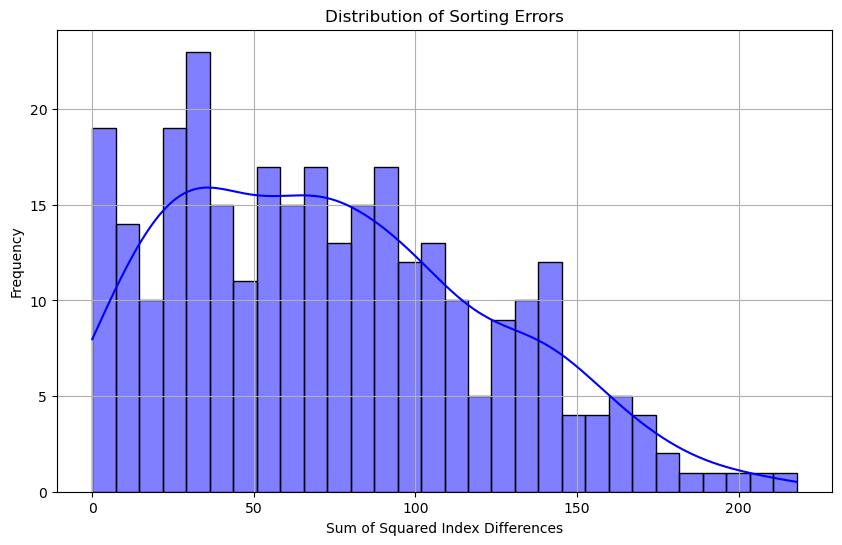

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'errors' list is already calculated as before

# Plot the errors using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='blue')
plt.title('Distribution of Sorting Errors')
plt.xlabel('Sum of Squared Index Differences')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()